In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [2]:
df = pd.read_csv('../原始数据集/ETTh1.csv')
df.head(2)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,7/1/2016 0:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,7/1/2016 1:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [4]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [5]:
feature = df[['dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
feature

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,
2016-07-01 00:00:00,4,3,7,2016,183,1,26
2016-07-01 01:00:00,4,3,7,2016,183,1,26
2016-07-01 02:00:00,4,3,7,2016,183,1,26
2016-07-01 03:00:00,4,3,7,2016,183,1,26
2016-07-01 04:00:00,4,3,7,2016,183,1,26
...,...,...,...,...,...,...,...
2018-06-26 15:00:00,1,2,6,2018,177,26,26
2018-06-26 16:00:00,1,2,6,2018,177,26,26
2018-06-26 17:00:00,1,2,6,2018,177,26,26


In [6]:
show = df[['OT']]
# 使用STL进行分解
period = 24
stl = STL(show, seasonal=13, period=period)
result = stl.fit()

In [7]:
df = df.reset_index()

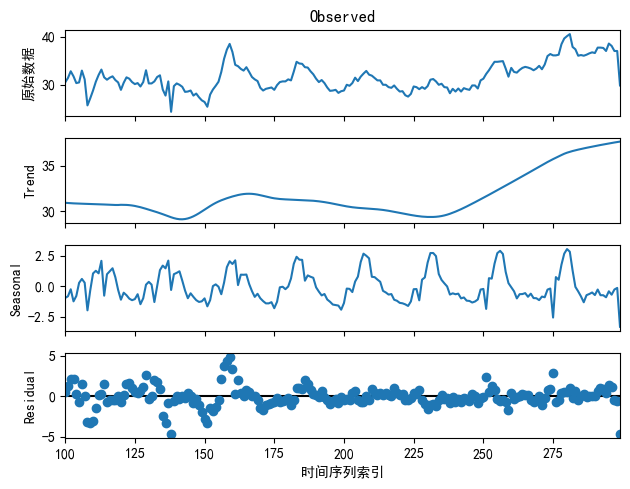

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import pandas as pd

# 假设df是你的DataFrame，包含列'OT'
# df = pd.read_csv('your_data.csv')

# 数据展示
show = df[['OT']].iloc[100:300]

# 使用STL进行分解
period = 24
stl = STL(show, seasonal=13, period=period)
res = stl.fit()
# 设置字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 确保负号正常显示
# 绘制STL分解图，并添加标题
fig = res.plot()

# 获取子图的Axes对象
axes = fig.get_axes()

# 设置每个子图的横纵坐标标签
axes[0].set_ylabel('原始数据')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

# 设置共享的x轴标签
axes[3].set_xlabel('时间序列索引')
plt.show()


In [7]:
df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

In [8]:
# 计算相关性
# 计算相关性
correlations = df.corr()['OT'].drop('OT')

In [36]:
correlations = pd.DataFrame(correlations)
correlations.to_csv('output/feature_ETTh1.csv')

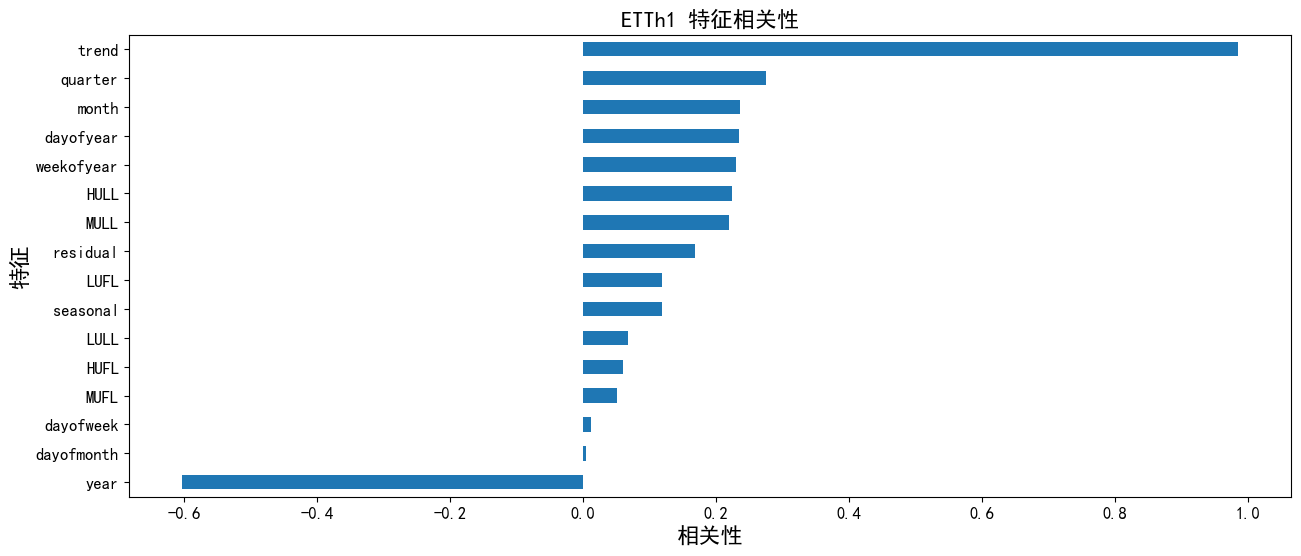

In [12]:
# 绘制柱状图
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 6))
correlations.sort_values().plot(kind='barh')
plt.title('ETTh1 特征相关性', fontsize=16)
plt.xlabel('相关性', fontsize=16)
plt.ylabel('特征', fontsize=16)
# 设置刻度标签的字体大小
plt.xticks(fontsize=12)  # 设置x轴刻度标签字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度标签字体大小
plt.show()


In [15]:
df.to_csv('ETTh1.csv',index=False)

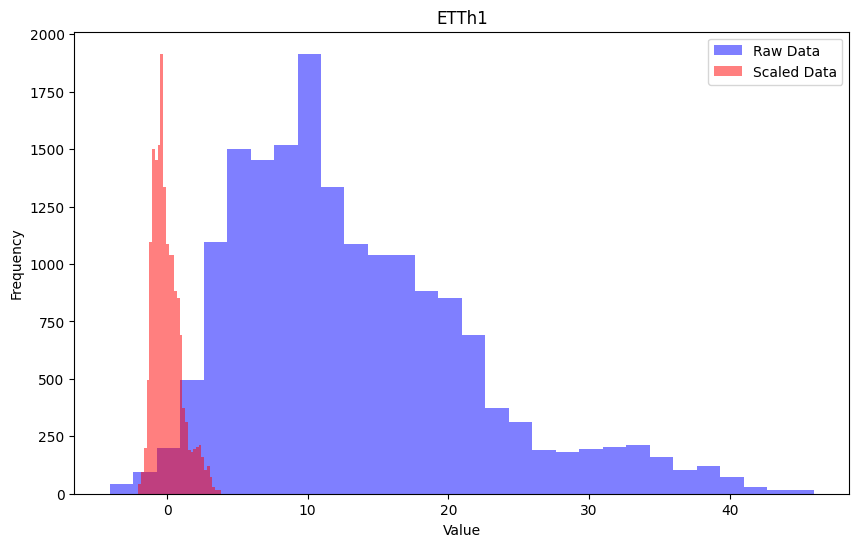

In [32]:
# 示例数据：标准化前的数据和标准化后的数据
data_raw = df['OT']
data_scaled = (data_raw - np.mean(data_raw)) / np.std(data_raw)

# 绘制直方图
plt.figure(figsize=(10, 6))

# 绘制标准化前的数据的直方图
plt.hist(data_raw, bins=30, color='blue', alpha=0.5, label='Raw Data')

# 绘制标准化后的数据的直方图
plt.hist(data_scaled, bins=30, color='red', alpha=0.5, label='Scaled Data')

# 添加图例和标题
plt.legend()
plt.title('ETTh1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()